# First Geospatial tutorial

### imports

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Along the way, you'll offer solutions to several real-world problems like:

* Where should a global non-profit expand its reach in remote areas of the Philippines?
* How do purple martins, a threatened bird species, travel between North and South America? Are the birds travelling to conservation areas?
* Which areas of Japan could potentially benefit from extra earthquake reinforcement?
* Which Starbucks stores in California are strong candidates for the next Starbucks Reserve Roastery location?
* Does New York City have sufficient hospitals to respond to motor vehicle collisions? Which areas of the city have gaps in coverage?


In [2]:
DEC_LANDS_PATH = './data/DEC_lands/DEClands.shp'
full_data = gpd.read_file(DEC_LANDS_PATH)

In [6]:
full_data.dtypes

OBJECTID         int64
CATEGORY        object
UNIT            object
FACILITY        object
CLASS           object
UMP             object
DESCRIPTIO      object
REGION           int64
COUNTY          object
URL             object
SOURCE          object
UPDATE_         object
OFFICE          object
ACRES          float64
LANDS_UID        int64
GREENCERT       object
UMPURL          object
SHAPE_AREA     float64
SHAPE_LEN      float64
geometry      geometry
dtype: object

In [7]:
type(full_data)

geopandas.geodataframe.GeoDataFrame

In [9]:
data = full_data.loc[:, ['CLASS', 'COUNTY', 'geometry']].copy()

In [12]:
data['CLASS'].value_counts()

WILD FOREST                   963
INTENSIVE USE                 107
PRIMITIVE                      63
WILDERNESS                     52
UNCLASSIFIED                   13
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [14]:
WILD_TYPES = ['WILD FOREST', 'WILDERNESS']
wild_lands_data = data[data['CLASS'].isin(WILD_TYPES)]
wild_lands_data.head()

CLASS    COUNTY                                           geometry
0  WILD FOREST  HERKIMER  POLYGON ((502476.666 4842386.993, 502476.739 4...
1  WILD FOREST  HERKIMER  POLYGON ((502090.747 4840324.577, 502110.011 4...
2  WILD FOREST     LEWIS  POLYGON ((508503.626 4864992.965, 509092.576 4...
3  WILD FOREST     LEWIS  POLYGON ((490114.810 4859403.501, 490142.561 4...
4  WILD FOREST     LEWIS  POLYGON ((481679.514 4853407.042, 481072.554 4...

### Creating some maps

<AxesSubplot:>

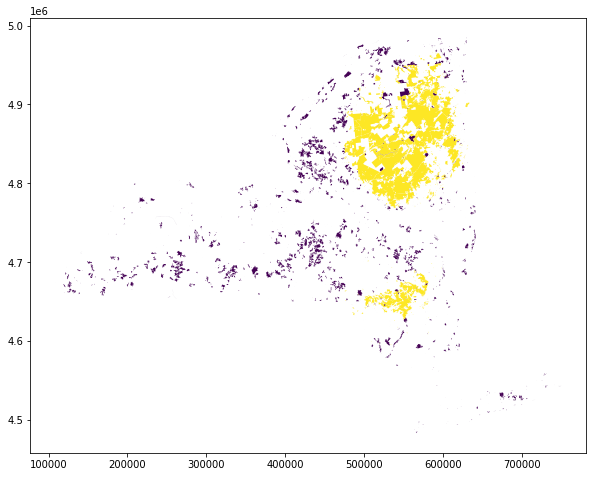

In [27]:
data['is_wilderness'] = data['CLASS'].isin(WILD_TYPES)
data.plot(column='is_wilderness', figsize=(14, 8))

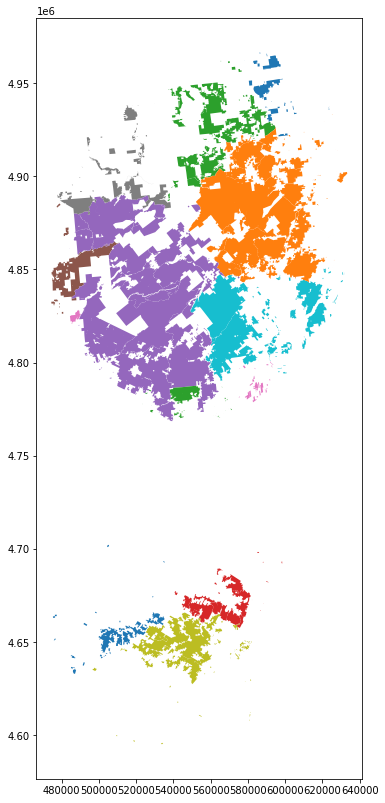

In [22]:
wild_lands_data.plot(figsize=(14, 14), column='COUNTY');

In [51]:
poi_data = gpd.read_file('./data/Decptsofinterest.shp', encoding="utf-8")
road_data = gpd.read_file('./data/DEC_roadstrails/Decroadstrails.shp', encoding="utf-8")
county_data = gpd.read_file('./data/NY_county_boundaries/NY_county_boundaries.shp')

In [67]:
county_data.shape
# dbx file contains information about the columns (!IMPORTANT)

(67, 81)

### .shp is a mandatory Esri file that gives features their geometry. 
##### Every shapefile has its own .shp file that represent spatial vector data. For example, it could be points, lines and polygons in a map.

###  Index File (.SHX)
##### .shx are mandatory Esri and AutoCAD shape index position. This type of file is used to search forward and backwards.

### dBASE File (.DBF)
##### .dbf is a standard database file used to store attribute data and object IDs. A .dbf file is mandatory for shape files. You can open .DBF files in Microsoft Access or Exce

### .prj
##### .prj is an optional file that contains the metadata associated with the shapefiles coordinate and projection system. If this file does not exist, you will get the error “unknown coordinate system”. If you want to fix this error, you have to use the “define projection” tool which generates .prj files.

### Extensible Markup Language File (.XML)
##### .xml file types contains the metadata associated with the shapefile. If you delete this file, you essentially delete your metadata. You can open and edit this optional file type (.xml) in any text editor.

### Spatial Index File (.SBN)
##### .sbn is an optional spatial index file that optimizes spatial queries. This file type is saved together with a .sbx file. These two files make up a shape index to speed up spatial queries.

### Spatial Index File (.SBX)
.sbx are similar to .sbn files in which they speed up loading times. It works with .sbn files to optimize spatial queries. We tested .sbn and .sbx extensions and found that there were faster load times when these files existed. It was 6 seconds faster (27.3 sec versus 33.3 sec) compared with/without .sbn and .sbx files.

In [50]:
CAMPSITE_TYPE = 'PRIMITIVE CAMPSITE'
campsites_df = poi_data[poi_data['ASSET'] == CAMPSITE_TYPE].copy()

#### The plot() method takes as (optional) input several parameters that can be used to customize the appearance. Most importantly, setting a value for ax ensures that all of the information is plotted on the same map.

0       False
1       False
2       False
3       False
4       False
        ...  
8137    False
8138    False
8139    False
8140    False
8141    False
Length: 8142, dtype: bool

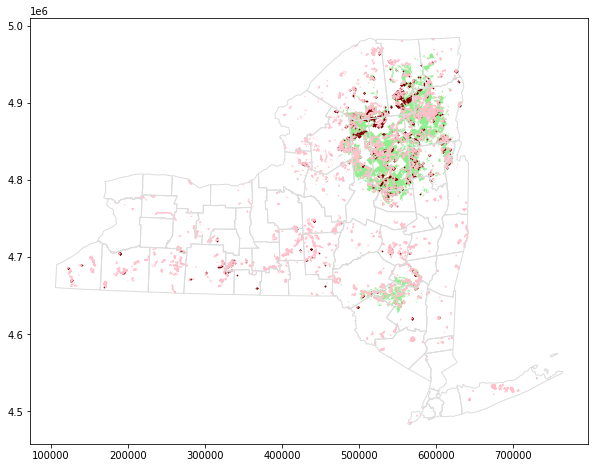

In [68]:
# Define a base map with county boundaries
ax = county_data.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

wild_lands_data.plot(color='lightgreen', ax=ax)
campsites_df.plot(color='maroon', markersize=0.5, ax=ax)
road_data.plot(color='pink', ax=ax)

In [70]:
# checking whether a point is inside a polygon
road_data.geometry.within(county_data.loc[0, 'geometry']).value_counts()

False    7563
True      579
dtype: int64